<a href="https://colab.research.google.com/github/41243205/Colab/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 14.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade ultralytics

In [ ]:
import torch
from ultralytics import SAM

# 測試 PyTorch
print(f"PyTorch 版本: {torch.__version__}")
print(f"GPU 是否可用: {torch.cuda.is_available()}")

# 測試 Ultralytics 的 SAM
model = SAM("sam2.1_b.pt")  # 自動下載 SAM 模型權重
print(model)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch 版本: 2.5.1+cu121
GPU 是否可用: False


100%|██████████| 154M/154M [00:02<00:00, 60.2MB/s]


SAM(
  (model): SAM2Model(
    (image_encoder): ImageEncoder(
      (trunk): Hiera(
        (patch_embed): PatchEmbed(
          (proj): Conv2d(3, 112, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
        )
        (blocks): ModuleList(
          (0-1): 2 x MultiScaleBlock(
            (norm1): LayerNorm((112,), eps=1e-06, elementwise_affine=True)
            (attn): MultiScaleAttention(
              (qkv): Linear(in_features=112, out_features=336, bias=True)
              (proj): Linear(in_features=112, out_features=112, bias=True)
            )
            (drop_path): Identity()
            (norm2): LayerNorm((112,), eps=1e-06, elementwise_affine=True)
            (mlp): MLP(
              (layers): ModuleList(
                (0): Linear(in_features=112, out_features=448, bias=True)
                (1): Linear(in_features=448, out_features=112, bias=True)
              )
              (act): GELU(approximate='none')
            )
          )
          (2): MultiScaleBlock(
 

# Downloading Data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d1xLHLiodXpR4NQIO9nN")
project = rf.workspace("scalpelseg").project("scalpel-p3hny")
version = project.version(4)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to scalpel-4 in yolov11:: 100%|██████████| 400/400 [00:00<00:00, 6413.09it/s]


# Training Instance Segmentation Model

In [ ]:
from ultralytics import YOLO

# 根據 YAML 構建模型結構，並加載預訓練權重
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")

# 開始訓練
results = model.train(
    data="/content/scalpel-4/data.yaml",  # 替換為你的 YAML 文件路徑
    epochs=10,  # 訓練次數
    imgsz=640,   # 圖片大小
    task="segment"  # 指定分割任務
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 67.7MB/s]

Transferred 499/561 items from pretrained weights


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=/content/scalpel-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/scalpel-4/train/labels... 135 images, 1 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<00:00, 805.38it/s]

train: New cache created: /content/scalpel-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/scalpel-4/valid/labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 974.33it/s]

val: New cache created: /content/scalpel-4/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G       1.66      7.194      3.841       1.81         15        640: 100%|██████████| 9/9 [03:14<00:00, 21.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.87s/it]

                   all         41         58     0.0046      0.969      0.207       0.11    0.00024     0.0541   0.000831    0.00015



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.235      4.584      3.379      1.618          8        640: 100%|██████████| 9/9 [02:45<00:00, 18.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.82s/it]

                   all         41         58    0.00437      0.918      0.178     0.0955   0.000223     0.0577    0.00014    1.8e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.211      3.332      3.152      1.547          7        640: 100%|██████████| 9/9 [02:49<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.68s/it]

                   all         41         58    0.00459      0.953      0.252      0.135   0.000286     0.0769   0.000601   0.000176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.142      2.604      2.875      1.534          8        640: 100%|██████████| 9/9 [02:53<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.30s/it]

                   all         41         58     0.0045       0.95      0.299      0.184   0.000475      0.112   0.000471   0.000105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.195      2.272      2.666      1.537         10        640: 100%|██████████| 9/9 [02:54<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.24s/it]

                   all         41         58    0.00467      0.984      0.309      0.177    0.00263       0.55     0.0925     0.0318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.144       1.89      2.399      1.505          8        640: 100%|██████████| 9/9 [02:37<00:00, 17.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.60s/it]

                   all         41         58    0.00468      0.984      0.331      0.168    0.00385      0.814      0.247      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.102      1.703      2.197       1.39         11        640: 100%|██████████| 9/9 [02:48<00:00, 18.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.42s/it]

                   all         41         58      0.248      0.537      0.417      0.237      0.224      0.428      0.317      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.017      1.652      2.053      1.346         10        640: 100%|██████████| 9/9 [03:08<00:00, 20.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.16s/it]

                   all         41         58      0.788      0.301       0.53      0.336       0.73      0.254      0.394      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9868      1.423      2.092      1.326          8        640: 100%|██████████| 9/9 [02:43<00:00, 18.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.61s/it]

                   all         41         58      0.766      0.394      0.571      0.314      0.696        0.3      0.449      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9454      1.314      1.875      1.291         14        640: 100%|██████████| 9/9 [02:44<00:00, 18.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.11s/it]

                   all         41         58      0.639      0.494      0.653      0.442      0.576      0.398        0.5      0.324



10 epochs completed in 0.544 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 265 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.18s/it]


                   all         41         58      0.639      0.494      0.654      0.443      0.582      0.397      0.502      0.325
               Syringe         21         32      0.523       0.75      0.659      0.437      0.413      0.562      0.462      0.215
               scalpel         20         26      0.755      0.237       0.65      0.449       0.75      0.231      0.542      0.434
Speed: 3.5ms preprocess, 360.5ms inference, 0.0ms loss, 22.6ms postprocess per image
Results saved to runs/segment/train


# Inference

In [ ]:
from IPython.display import Image

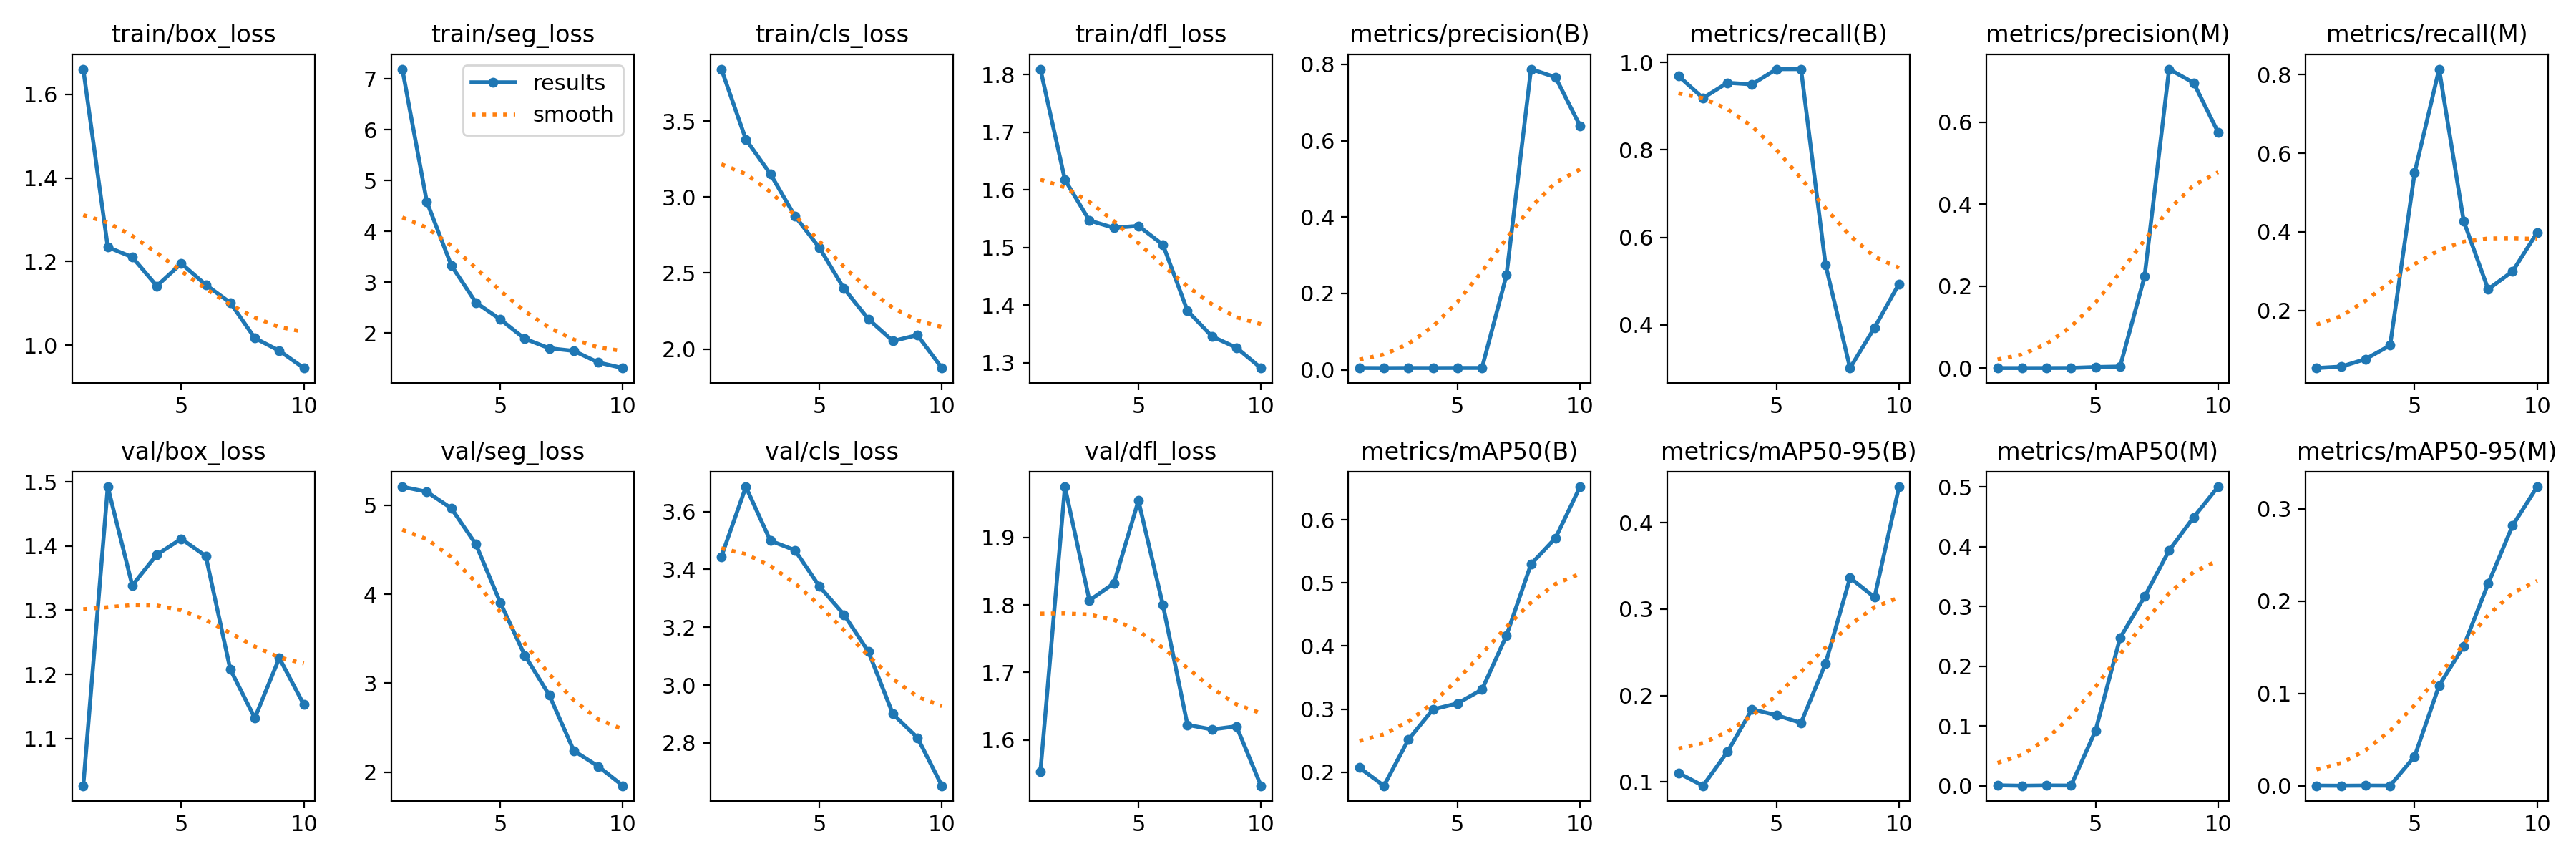

In [ ]:
Image("/content/runs/segment/train/results.png",width=600)


image 1/1 /content/scalpel-4/test/images/16_jpg.rf.086a037309dbca10174984938be18b3e.jpg: 640x640 3 scalpels, 314.4ms
Speed: 4.2ms preprocess, 314.4ms inference, 43.5ms postprocess per image at shape (1, 3, 640, 640)


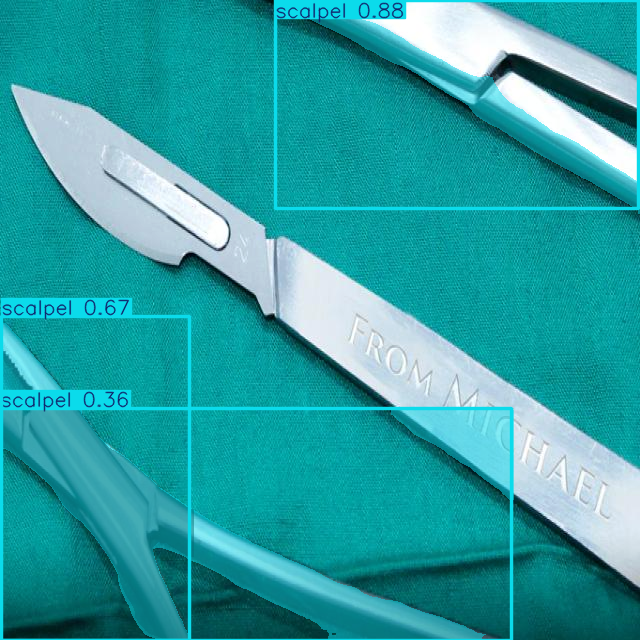

'/content/output/text.png'

In [ ]:
from ultralytics import YOLO

# 載入 YOLO 模型
model = YOLO("/content/runs/segment/train/weights/best.pt")

results = model("/content/scalpel-4/test/images/16_jpg.rf.086a037309dbca10174984938be18b3e.jpg")

# 顯示分割結果
results[0].show()

#指定儲存輸出路徑
results[0].save("/content/output/text.png")


image 1/1 /content/scalpel-4/test/images/72_jpg.rf.64f432132c7baae2a7629a52fe9b6555.jpg: 640x640 1 scalpel, 324.8ms
Speed: 3.1ms preprocess, 324.8ms inference, 11.7ms postprocess per image at shape (1, 3, 640, 640)


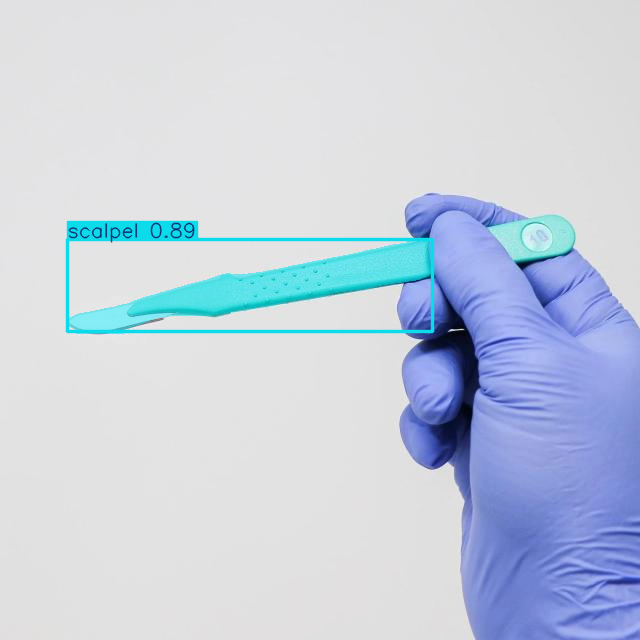


image 1/1 /content/scalpel-4/test/images/16_jpg.rf.086a037309dbca10174984938be18b3e.jpg: 640x640 3 scalpels, 310.6ms
Speed: 3.7ms preprocess, 310.6ms inference, 19.4ms postprocess per image at shape (1, 3, 640, 640)


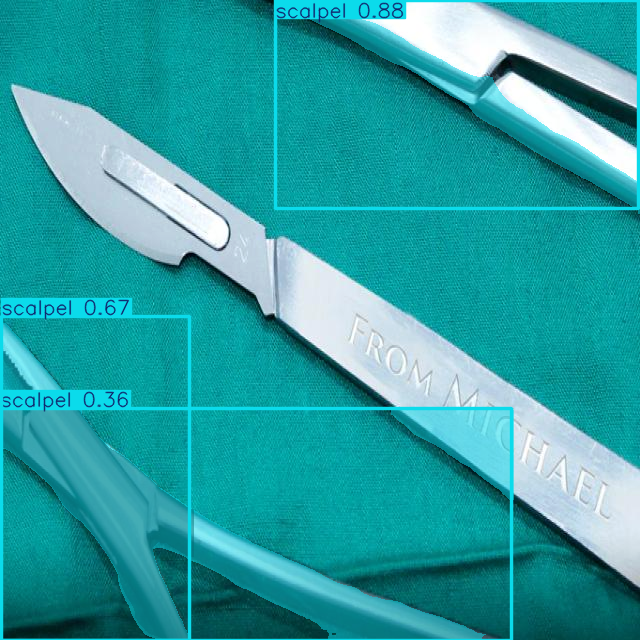


image 1/1 /content/scalpel-4/test/images/63_webp.rf.d0fbc566d73a4dd8b9f3c083154eac37.jpg: 640x640 1 Syringe, 368.3ms
Speed: 4.2ms preprocess, 368.3ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


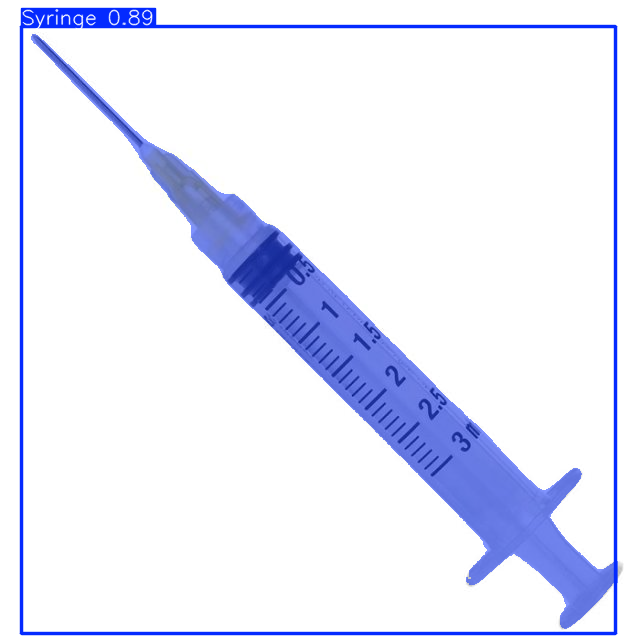


image 1/1 /content/scalpel-4/test/images/27_png.rf.e11a8b58635d6b28f800ea82e362fc1f.jpg: 640x640 2 Syringes, 343.9ms
Speed: 3.8ms preprocess, 343.9ms inference, 10.3ms postprocess per image at shape (1, 3, 640, 640)


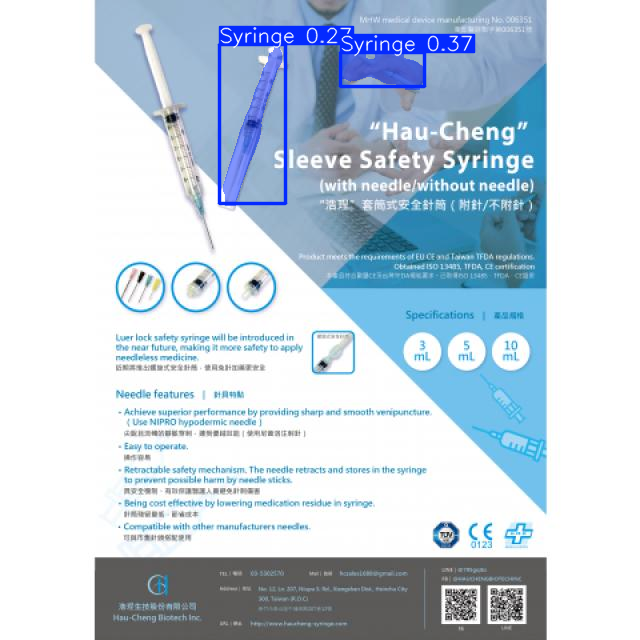


image 1/1 /content/scalpel-4/test/images/8_jpg.rf.76294a88901bb2c2e5dfbfcde87d45ee.jpg: 640x640 3 Syringes, 349.7ms
Speed: 3.8ms preprocess, 349.7ms inference, 22.8ms postprocess per image at shape (1, 3, 640, 640)


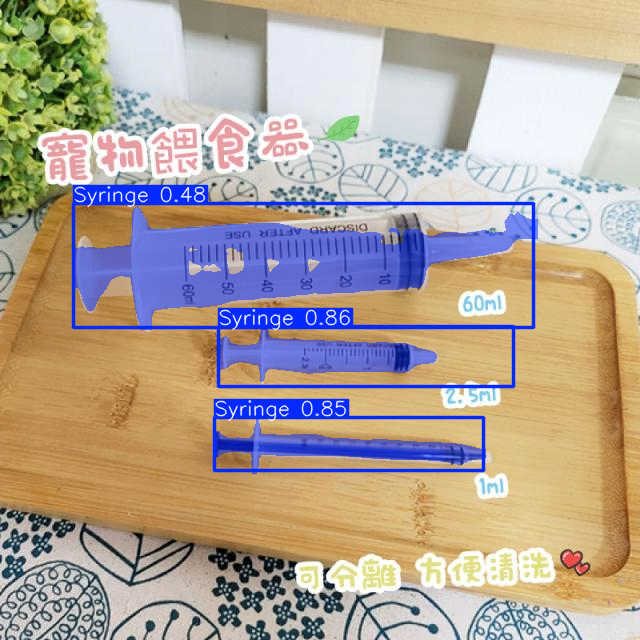


image 1/1 /content/scalpel-4/test/images/4_jpg.rf.ea7aefe7a4254b861c075a3a58527f8b.jpg: 640x640 1 scalpel, 459.6ms
Speed: 3.5ms preprocess, 459.6ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


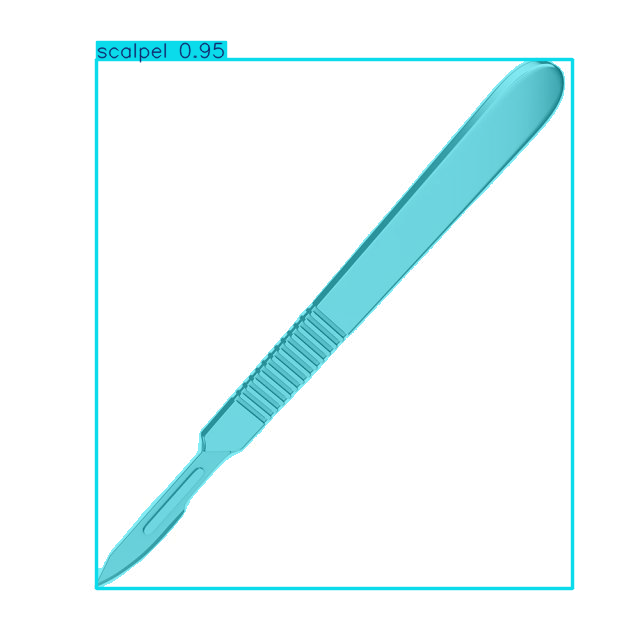


image 1/1 /content/scalpel-4/test/images/19_jpg.rf.3f138e6387a22a5c4f9ceb29f03d2331.jpg: 640x640 1 scalpel, 423.0ms
Speed: 3.6ms preprocess, 423.0ms inference, 10.5ms postprocess per image at shape (1, 3, 640, 640)


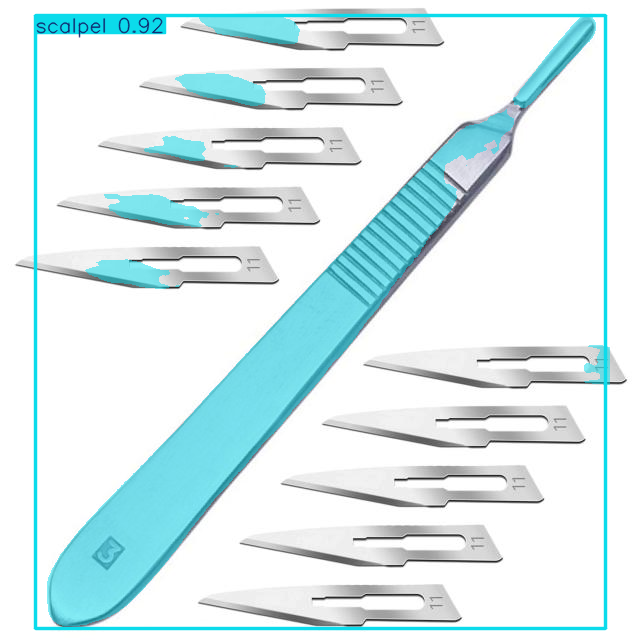


image 1/1 /content/scalpel-4/test/images/20_jpg.rf.9bcf741a3ee4c180e8944a6e2927360c.jpg: 640x640 8 Syringes, 482.0ms
Speed: 7.3ms preprocess, 482.0ms inference, 46.9ms postprocess per image at shape (1, 3, 640, 640)


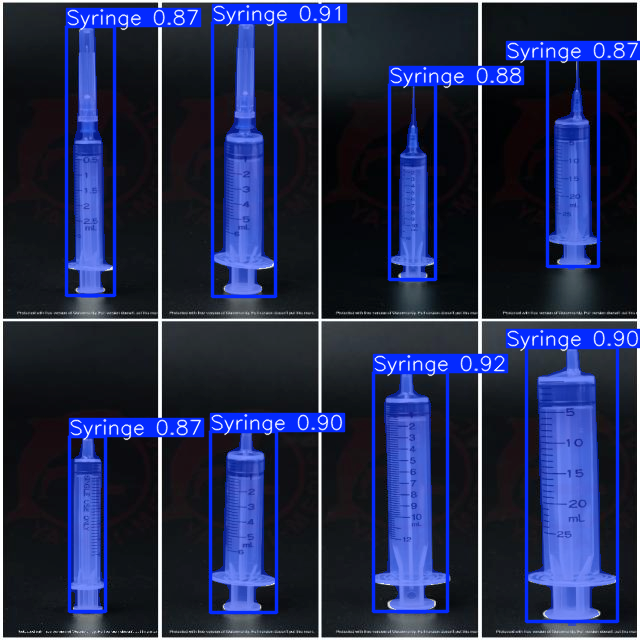


image 1/1 /content/scalpel-4/test/images/31_jpg.rf.6e0d4fcb7b1fee4c9e8a1ebef73b0e7e.jpg: 640x640 1 scalpel, 509.2ms
Speed: 5.1ms preprocess, 509.2ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 640)


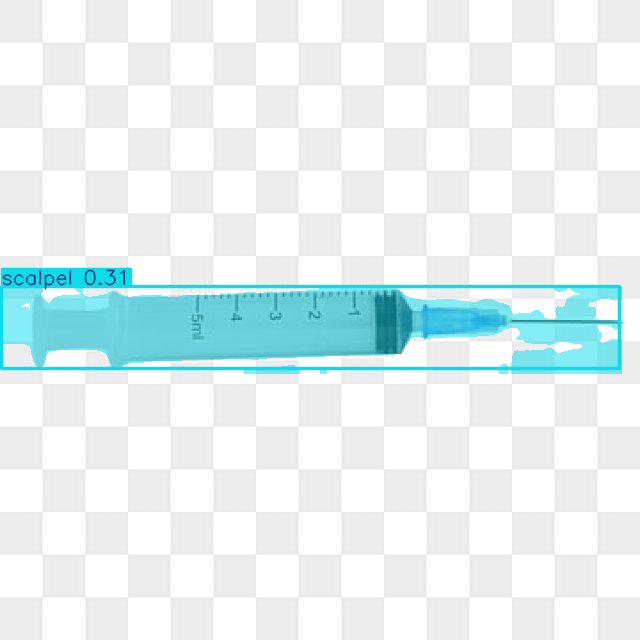


image 1/1 /content/scalpel-4/test/images/79_jpg.rf.8a72569884f2ec2ea6b11c345df154d3.jpg: 640x640 1 scalpel, 465.6ms
Speed: 3.8ms preprocess, 465.6ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)


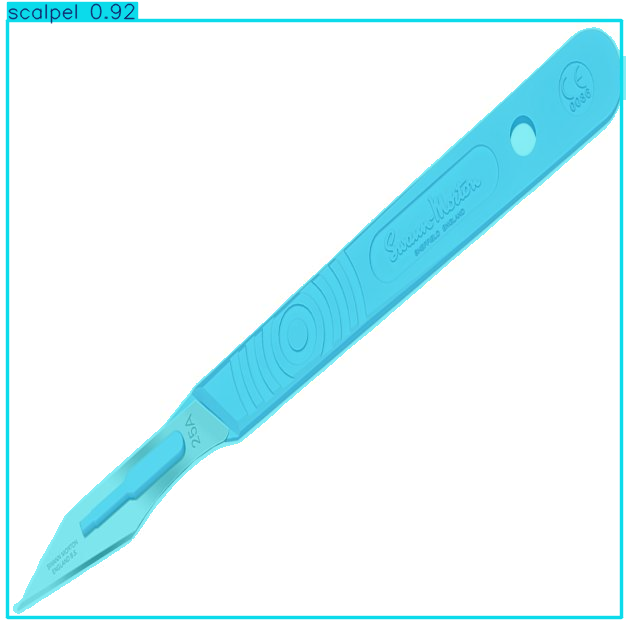


image 1/1 /content/scalpel-4/test/images/29_jpg.rf.ee0f84ee06a41e0cc98169c6b317dc00.jpg: 640x640 1 scalpel, 496.9ms
Speed: 3.7ms preprocess, 496.9ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 640)


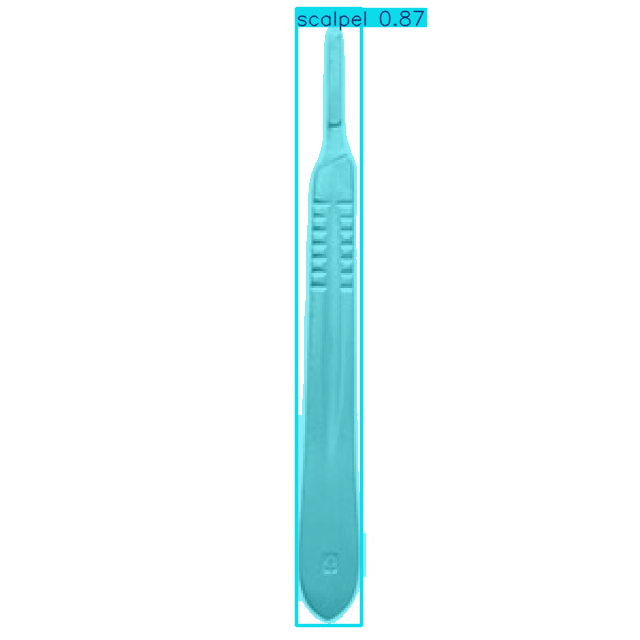


image 1/1 /content/scalpel-4/test/images/88_jpg.rf.0d494445ea3288ccec8af2ee9b9863ed.jpg: 640x640 3 Syringes, 513.6ms
Speed: 3.6ms preprocess, 513.6ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 640)


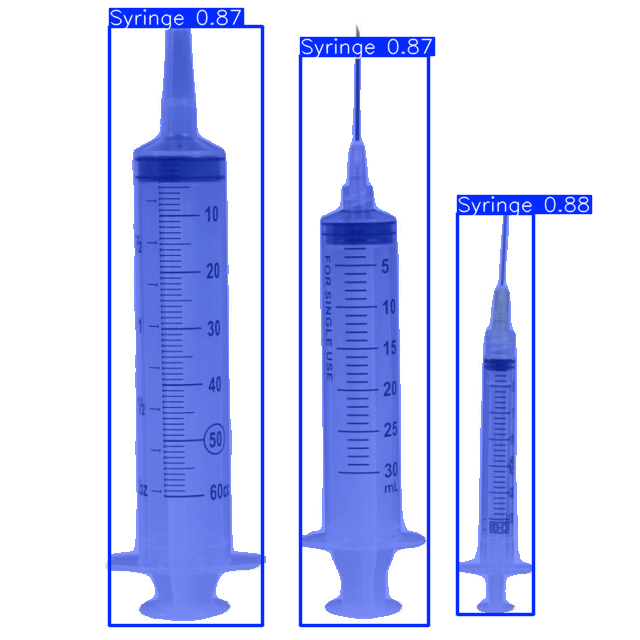


image 1/1 /content/scalpel-4/test/images/32_jpg.rf.b29b2fd646e0a93dc63e02bbc5cb6145.jpg: 640x640 3 Syringes, 443.2ms
Speed: 3.5ms preprocess, 443.2ms inference, 29.9ms postprocess per image at shape (1, 3, 640, 640)


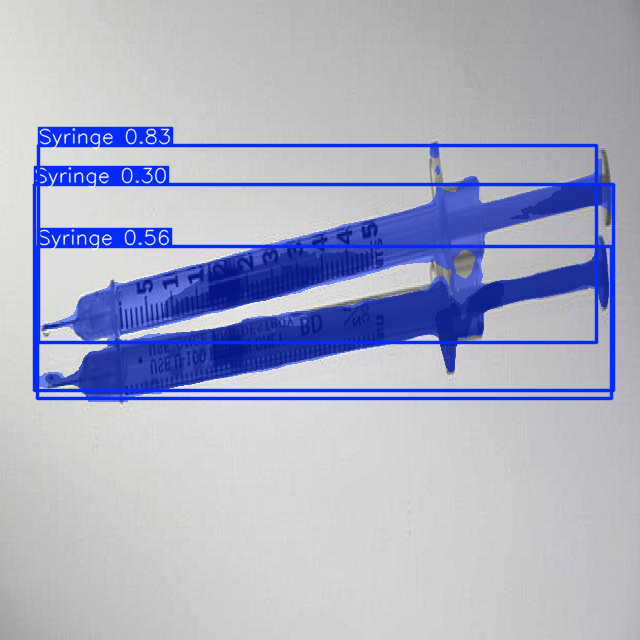


image 1/1 /content/scalpel-4/test/images/36_jpg.rf.6de60d00068fc83c902a42a09c4a89e5.jpg: 640x640 2 Syringes, 502.3ms
Speed: 3.7ms preprocess, 502.3ms inference, 14.7ms postprocess per image at shape (1, 3, 640, 640)


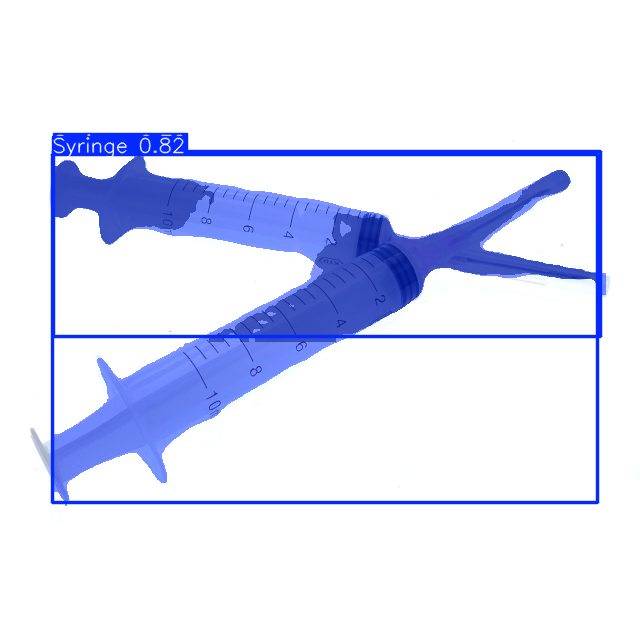


image 1/1 /content/scalpel-4/test/images/88_jpg.rf.0b561649193c88990bab9f728f7b04eb.jpg: 640x640 1 scalpel, 527.9ms
Speed: 4.5ms preprocess, 527.9ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)


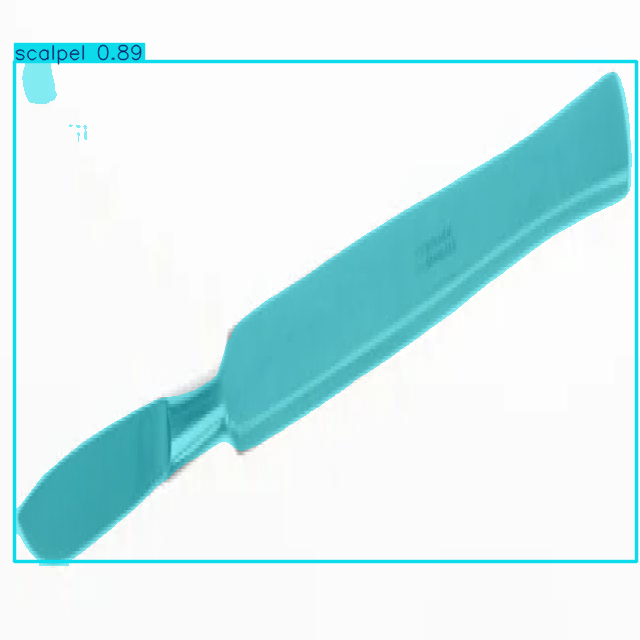


image 1/1 /content/scalpel-4/test/images/44_jpg.rf.ac3be1aa421e7b839e6f2e2288a4bb9d.jpg: 640x640 1 scalpel, 539.8ms
Speed: 3.5ms preprocess, 539.8ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)


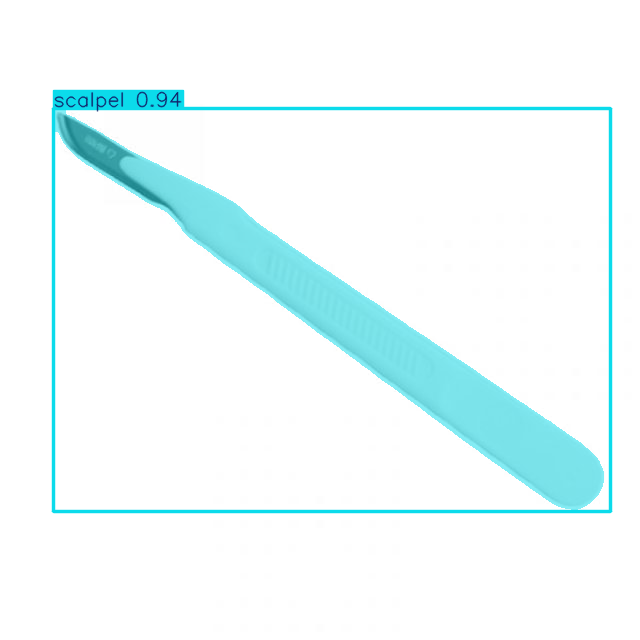


image 1/1 /content/scalpel-4/test/images/62_jpg.rf.2c452d4c80cb63430878ceb7c69b148b.jpg: 640x640 1 scalpel, 512.4ms
Speed: 3.6ms preprocess, 512.4ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)


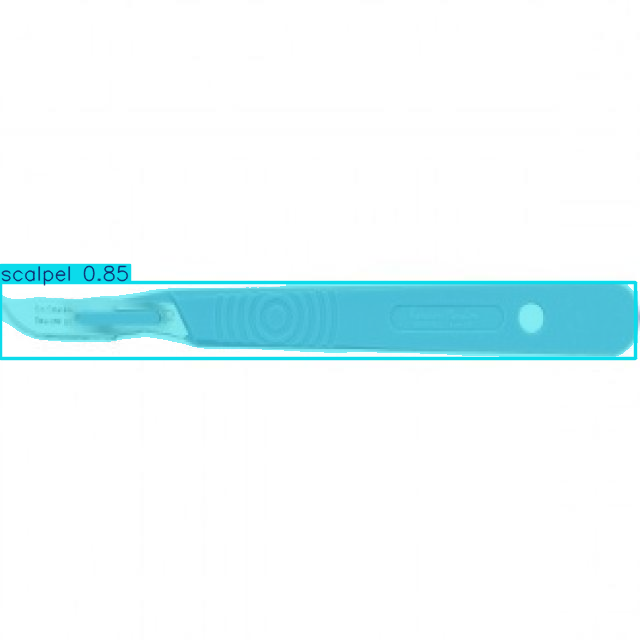


image 1/1 /content/scalpel-4/test/images/75_webp.rf.65d407071110dd9c3474fc6feff87101.jpg: 640x640 2 Syringes, 524.9ms
Speed: 3.4ms preprocess, 524.9ms inference, 14.1ms postprocess per image at shape (1, 3, 640, 640)


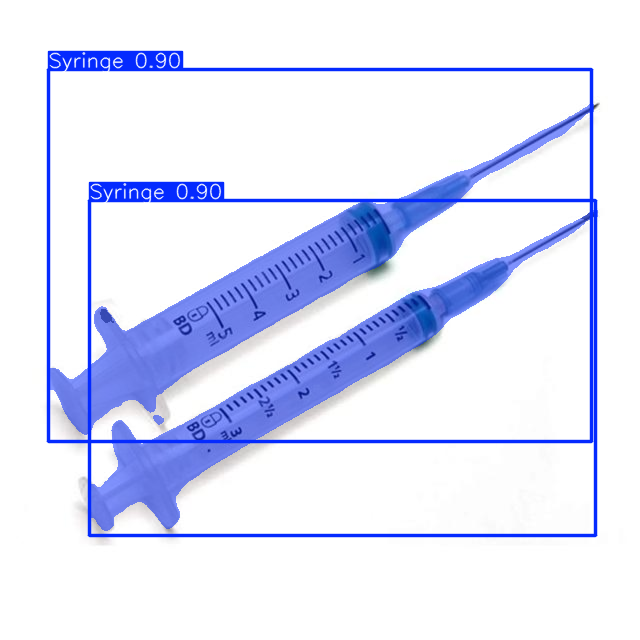

In [ ]:
from ultralytics import YOLO
import os

# 載入 YOLO 模型
model = YOLO("/content/runs/segment/train/weights/best.pt")

# 定義輸入資料夾與輸出資料夾
input_dir = "/content/scalpel-4/test/images"
output_dir = "/content/output"

# 讀取輸入資料夾中的所有圖片檔案
image_paths = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png'))]

# 針對每張圖片進行推理並儲存結果
for img_path in image_paths:
    # 執行推理
    results = model(img_path)

    # 顯示分割結果（可選）
    results[0].show()

    # 定義儲存路徑，保持與輸入檔案同名
    output_path = os.path.join(output_dir, os.path.basename(img_path))

    # 保存結果
    results[0].save(output_path)

In [ ]:
for result in results:
    print(result.boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.8972, 0.8960])
data: tensor([[ 48.0562,  69.0418, 591.5529, 441.2209,   0.8972,   0.0000],
        [ 89.4966, 200.1888, 595.4001, 535.9567,   0.8960,   0.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[319.8045, 255.1313, 543.4967, 372.1791],
        [342.4484, 368.0728, 505.9034, 335.7678]])
xywhn: tensor([[0.4997, 0.3986, 0.8492, 0.5815],
        [0.5351, 0.5751, 0.7905, 0.5246]])
xyxy: tensor([[ 48.0562,  69.0418, 591.5529, 441.2209],
        [ 89.4966, 200.1888, 595.4001, 535.9567]])
xyxyn: tensor([[0.0751, 0.1079, 0.9243, 0.6894],
        [0.1398, 0.3128, 0.9303, 0.8374]])


In [ ]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/content/runs/segment/train/weights/best.pt")

# Load the SAM model
sam_model = SAM("sam2.1_b.pt")

# Run batched inference on a list of images
results = yolo_model(["/content/output/19_jpg.rf.3f138e6387a22a5c4f9ceb29f03d2331.jpg"])

# Iterate over YOLO results
for result in results:
    class_ids = result.boxes.cls.int().tolist()
    if len(class_ids):  # Check if any objects detected
        boxes = result.boxes.xyxy
        sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True)

100%|██████████| 154M/154M [00:01<00:00, 143MB/s]



0: 640x640 1 scalpel, 465.4ms
Speed: 3.8ms preprocess, 465.4ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
